#Lab- Binary Classification & Regression for Classification


## What is classification?
**_Classification_** is the process of predicting a _categorical label_ for a sample based on some characteristics about that sample.  Categorical labels just mean you are labling the sample with a name or identifying number, not trying to calculate some mathematical value related to the sample.  This is what separates _classification_ from _regression_.

As the title of the lab implies, we will be learning about how to do classification tasks in Python.  We will be using simple machine learning models to help us in this task.  We can do this easily by making use of the fantastic [Scikit-Learn](https://scikit-learn.org/) library, which contains a treasure-trove of machine learning models and helper code to automate common tasks in model training and evaluation.  Scikit-Learn stops short of "deep learning" models (although it does contain one -- the Multi-Layer Perceptron), but the statistical, mathematical, and data mining models it contains will solve a multitude of problems quickly and easily.


This lab was initially developed at Arkansas State University by Dr. Jason Causey and expanded by Jennifer Fowler (https://github.com/jennifer-fowler).

*Note:* If you are not familiar with Colab or Jupyter Notebooks, we recommended that you participate in a Colab or Jupyter Notebook tutorial to understand how to use the environment. This notebook does not have guidance on the basic operation of the environment.

* Video overview of Google Colab: https://youtu.be/NUJMprxho5o

* Colab tutorial: https://colab.research.google.com/notebooks/basic_features_overview.ipynb 

* Jupyter Notebook Beginner's Guide: https://www.dataquest.io/blog/jupyter-notebook-tutorial/ 


Legend:

📌 This symbol is used to describe the Exercises you'll be completing.

⏸ This symbol is for Detours, supplemental info in case you want it.

🏀 This symbol means it's your turn to play ball and type some code.

🦞 This symbol is used to explain the mathematical concepts related to the exercise.

## 📌 Exercise- Regression for Classification --------------------------------------

1. Import the Banknote Authentication dataset, and split it into a training dataset and a testing dataset. 
2. Using sklearn, fit a logistic regression model on the training data.
3. Using sklearn, make predictions using the logistic regression model on the testing data.
4. Check the accuracy of your model using a confusion matrix, examining the precision and recall.
5. Plot a receiver operating characteristic (roc) curve for your model.




In [42]:
# now let's load the libraries needed for this lab
import pandas as pd             # NOTE: our code will refer to Pandas as `pd`
import numpy as np              # NOTE: our code will refer to Numpy as `np`
import sklearn.linear_model
import sklearn.neighbors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

## The "Banknote Authentication" dataset
The "Banknote Authentication" dataset is available from the [UCI Machine Learning repository](https://archive.ics.uci.edu) at <https://archive.ics.uci.edu/ml/datasets/banknote+authentication>.

![Banknotes](https://drive.google.com/uc?export=view&id=15WUC3ZhyEEFP2bvJWoNOh9h-iuP0L7pm)

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Attribute Information:

1. _variance_ of Wavelet Transformed image (continuous)
2. _skewness_ of Wavelet Transformed image (continuous)
3. _curtosis_ of Wavelet Transformed image (continuous)
4. _entropy_ of image (continuous)
5. _class_ (integer) 


### ⏸ Detour: CSV or TXT?

If you download the file "`data_banknote_authentication.txt`" from the UCI repository, you will see the first five lines look like the following:

    3.6216,8.6661,-2.8073,-0.44699,0
    4.5459,8.1674,-2.4586,-1.4621,0
    3.866,-2.6383,1.9242,0.10645,0
    3.4566,9.5228,-4.0112,-3.5944,0
    0.32924,-4.4552,4.5718,-0.9888,0

We can see that this is comma-separated values format (CSV) even though the filename ends in "`.txt`".  We can also see there is no header row with column names, so we have to use the "Attribute Information" provided (above) to make sense of the columns.


## Load the Banknote Dataset
Let's load the Banknote dataset directly from UCI's repository.  The [Pandas](https://pandas.pydata.org/) library can do this in a single step.

To make things nicer, we will also make a list of the column names (they aren't in the data file), and we will note the ones that are independent variables versus the one (_class_) that is the response or target variable.

In [2]:
# We will use a short version of the names of each attribute, 
# in the order they appear in the data file (see above):
features = [
    'variance',
    'skewness',
    'kurtosis',  # We use the common spelling here (UCI has "curtosis")
    'entropy',
    'class'
]


In [3]:
# now we will assign the independent features to a variable for the predictors
predictors = features[:-1] # all except the last item (all except 'class')

# and assign the dependent feature to the target variable
target = features[-1]  # only the last item, 'class'

Now, we will load the data directly from UCI.  The data file does not have a header row with column names, so we will use the ones we defined above.
The Pandas `pd.read_csv()` function can do the work for us.  

In [4]:
# Now, we will load the data directly from UCI.  The data file does not have
# a header row with column names, so we will use the ones we defined above.
bn_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", 
                      header=None, 
                      names = features)

Let's take a look at the dataframe we just created.  In particular, let's see what the labels (_class_) column contains, and how many examples we have for each class:

In [5]:
classes = list(bn_data['class'].unique())
# Make a dictionary to map the numeric class to a more descriptive label:
map_banknote_class_to_label = {
    0: 'authentic',
    1: 'inauthentic'
}
for cls in bn_data['class'].unique():
    print(f"Count for class {cls} ({map_banknote_class_to_label[cls]}): {(bn_data['class'] == cls).sum()}")

Count for class 0 (authentic): 762
Count for class 1 (inauthentic): 610


The `class` column labels the **authentic** notes with the class label 0, and the **inauthentic** (counterfeit) notes with the label 1.  We will consider the inauthentic notes as the "positive" class for this _binary classification_ problem.

Let's define a new list, class_names, to better distinguish the numeric class labels.

In [6]:
class_names = ['authentic', 'inauthentic']

**Let's store our data in a simpler way...**

It will be much easier to read our code while fitting models if we choose simple names for the variables and response.  We will call the variables `X` and the response `y`, as is common convention in mathematical modeling. 
The `.values` attribute makes the result a Numpy array instead of a Pandas dataframe.  That won't matter much, but it does mean we can use standard array notation with `X` and `y`.

In [29]:
X = bn_data[predictors].values
y = bn_data[target].values


## Baseline Model

We can see that 762 of the samples are authentic, so if we had a baseline model that always guesses "authentic", our accuracy would be $\frac{762}{1372} \approx 55\%$.

55% accuracy is only slightly better than guessing, so let's try some models to reach higher accuracy.

## ⏸  DETOUR: Scikit-Learn classifiers
The Scikit_Learn library provides several options for classifiers.  Some common choices for simple classification tasks are shown below:

* `LogisticRegression` - A linear classifer using logistic regression.
* `KNeighborsClassifier` - K-Nearest Neighbors classification.
* `SVC` - Support Vector Classifier (uses a Support Vector Machine model).
* `DecisionTreeClassifier` - A decision tree classifier.
* `RandomForestClassifier` - A random forest classifier.
* `AdaBoostClassifier` - Adaptive Boosting (AdaBoost) ensemble classifier.
* `GaussianNB` - Naive Bayes' classifer assuming Gaussian distributions.
* `GaussianProcessClassifier` - Gaussian process classification (GPC) based on Laplace approximation.
* `LinearDiscriminantAnalysis` - Linear discriminant analysis (LDA) classifier.
* `QuadraticDiscriminantAnalysis` - Quadratic discriminant analysis (QDA) classifier.
* `MLPClassifier` - Multi-Layer Perceptron (neural network) classifier.

Check the References for a link to the comparison of these tools.

Note that the list above is not comprehensive, as Scikit-Learn provides many more variations and more advanced models.  A more comprehensive list can be seen in this StackOverflow answer: <https://stackoverflow.com/a/54988354>.

## Choosing a Classification Model

With so many options available, how do we choose a model?

* "_Principle of Parsimony_" - Given more than one model with similar performance, the simpler model is likely the best choice.
* _Know your model._ Choose a model that fits the dataset.
  * Some models work better with _catgorical_ data (values that are not continuous numbers); some make assumptions about the distributions of the underlying data, etc.
  * Before applying a new model, be sure to read about any assumptions it makes, and what the expectations are for data format.

**What do we know about our Banknote dataset?**

* There are only two classes.  (It is a binary classification problem.)
* All variables (except the class label) are continuous numeric values.


**What models might be good to try?**


## Train / Test Split

Before we get ahead of ourselves, let's make sure we have a way of **_evaluating_** our model's performance once we have trained it.  To do that fairly, we have to set aside some of the data to serve as a _test set_.  Our model will never get to see those values until we are ready to evaluate its performance.

There are many ways to do this, but let's keep it simple for now:  We will select 20% of the total dataset, but we will do it so that the positive/negative balance (or imbalance) from the full dataset is retained.  To help do this with no guesswork, let's use the `StratifiedSplit` tool from Scikit-Learn.

The `splitter.split()` function is designed to be used in a loop.  We don't actually want that (we just want one split), so we are using the `next()` function to ask for just the first set of splits.

In [30]:
splitter = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.2, random_state=2023)  # test_size sets the ratio of testing examples (20%)
train_set, test_set = next(splitter.split(X, y))

## A simple linear model

Now that we have created a train/test split, let's train a model. 

For this example, let's pick the simplest classification model:  _logistic regression_.  Logistic regression models are really just simple linear regression models but applied in a classification context.  The model "learns" (by fitting the training data) a linear function that produces a hyperplane that best splits the data into the two classes (positive on one side, negative on the other).

The logistic regression model is available in Scikit-Learn by using the `sklearn.linear_model.LogisticRegression` class. Check the references for the link to the documentation for this function.

The first line declares an initialized the model (using all default parameters), and the second line fits the model to our observed training data.

Notice the use of the indices we created with the train/test splitter above.  This selects only those rows associated with the _train_ partition from the full datasest.

In [31]:
# now define the model
model = sklearn.linear_model.LogisticRegression()

# and fit it to our training data
model.fit(X[train_set], y[train_set])

LogisticRegression()

## Predicting Classes- Two Options
Now that we have declared and fit the model, let's use it to make predictions.  The `LogisticRegression` object has two possible ways to do this:

* `.predict()` method - predicts the class the example most likely belongs to. This is a method for binary classification. The function will assign a predicted class to each observation.
* `.predict_proba()` method - predicts the probability that the example belongs to each possible class. This is one of the ways we can use regression for classification. The function will assign a numerical probability, between 0 and 1, that each observation belongs to the given classes. So if a probability is above 0.5, it most likely belongs in that class. If it's below 0.5, it most likey does not belong in that class.

Let's see the first five predictions to make it clear how they are represented.

🏀       NOW IT'S YOUR TURN:


In [33]:
# use predict_proba() to make predictions on the test data
predictions = model.predict_proba(X[test_set])

# type the command to print the first 5 predictions
print(predictions[:5])


[[9.99984292e-01 1.57084673e-05]
 [6.84940581e-04 9.99315059e-01]
 [9.99999574e-01 4.25516388e-07]
 [2.73013590e-04 9.99726986e-01]
 [9.99995963e-01 4.03705500e-06]]


Note that the predictions are shown in scientific notation where the "`e-N`" represents the $\times 10^{N}$ part you would see in a textbook.

You can see that the probability of one of the labels for each example is close to 1.0, and the other tends to be very close to 0.0.  The fact that they aren't exactly 1 and 0 shows that there is a bit of uncertainty in the predictions.

If we just want to know the probability that a test sample belongs to the positive class ('inauthentic'), we can just look at the value in the second column and ignore the first column (as in `bn_predictions[:,1]`). We will use this trick later.

It would also be convenient to create a version of the predictions that contains the _categorical_ label of the most likely class for each test sample.  We can do this in a clever way by using Numpy's `np.argmax()` function to find the _column index_ of the column containing the largest value for each sample.  To do this, we will set `axis=1` to tell Numpy to look at the columns.  Note that this corresponds to a classification threshold of 0.5, which is common.  If you wanted to use a different threshold, you would need to write a bit different code to apply the class labels.

In [35]:
# establish a variable for the categorical predictions using np.argmax()
predictions_categorical = np.argmax(predictions, axis=1)

# print the first 5 predictions
print(predictions_categorical[:5])

[0 1 0 1 0]


## Measure the performance of the predictions

Now we want to see how we did...  Let's look at the information in a few different ways.  The first is to create something called a "confusion matrix".  Although the name is a bit odd, the idea is simple:  For each possible class, we want to know how often the model predicted test samples with that class _correctly_ or _incorrectly_.  Note that the prediction can be incorrect in two ways:  We could predict "positive" when the truth was that the sample was "negative" (we call this a _false positive_), or we could predict the sample is "negative" when it was actually conterfeit (we call this a _false negative_).

The confusion matrix will create a row for each of the true labels, and a column for each of the predicted lables, with counts for every possible combination of labelings (correct labelings are along the main diagonal).

We can quickly examine counts by using the `sklearn.metrics.confusion_matrix()` function. Check the References cell for the link to the documentation about this package.

In [36]:
# let's visualize the model accuracy 
# first in a simple array
cm = sklearn.metrics.confusion_matrix(y[test_set], predictions_categorical)
cm

array([[152,   1],
       [  0, 122]])

Although we can see the counts here, the output isn't very pretty.  If we want something that is a bit nicer for presentation, we can use ConfusionMatrixDisplay() from Scikit-Learn.

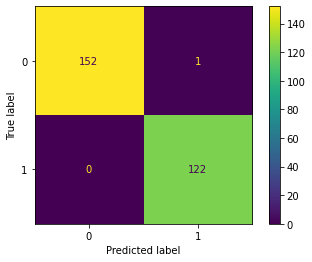

In [37]:
# use ConfusionMatrixDisplay() to plot and show the matrix
ConfusionMatrixDisplay(cm).plot()

**Wow!**

The `LogisticRegression` classifier did a fantastic job!  It is only mis-classifying one of the total 275 test examples.  That is $\frac{275-1}{275} = \frac{274}{275} \approx 0.99 = 99\%$ accuracy!

Let's look at some other ways of generating metrics about the classification performance.  First, we can ask Scikit-Learn to calculate the accuracy for us with `sklearn.metrics.accuracy_score()`:

In [38]:
# examine the accuracy of the model
# using sklearn's accuracy_score() function
sklearn.metrics.accuracy_score(y[test_set], predictions_categorical)


0.9963636363636363

We can also use the `sklearn.metrics.classification_report()` function to print a summary of the performance (this will work with binary or multi-class classifiers).

### ⏸ Detour: Precision & Recall

**_Precision_** is $\frac{TP}{TP + FP}$ where $TP$ means "_true positive_" (a sample that was predicted positive and the prediction was correct, or "true") and $FP$ means "_false positive_" (a sample that was predicted positive, but the prediction was incorrect, or "false").  So, precision is the ratio of true positives to the total number of positive predictions.

**_Recall_** is $\frac{TP}{TP+FN}$, using the same notation, where the $FN$ means "_false negative_" (the sample was predicted as negative, but the prediction was incorrect, or "false").  So recall is the ratio of true positives to _actual positives_ in the sample.

**_f1-score_** tries to show how well balanced the algorithm is.  The formula for f1-score is $\frac{2\cdot TP}{2\cdot TP + FP + FN}$.  Like precision, recall, and accuracy, its range is $[0,1]$ with 1.0 being "perfect".

**_Support_** just refers to the number of samples considered for the corresponding calculation.

In [40]:
# generate and print a classification report
# using sklearn's classification_report() function
print(sklearn.metrics.classification_report(
  y[test_set], 
  predictions_categorical, 
  labels=classes, 
  target_names=class_names)
)

              precision    recall  f1-score   support

   authentic       1.00      0.99      1.00       153
 inauthentic       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### ROC Curve
Another common visualization and metric for discussing the performance of a classification model is the _Receiver Operating Characteristic_ (ROC) curve, and the area under that curve (often called the AUROC or just AUC). Check the references for the link to the documentation for this function.

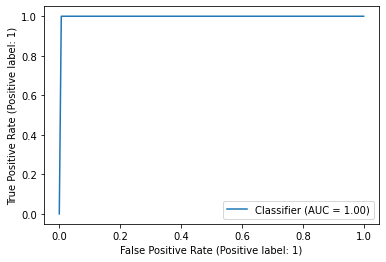

In [43]:
# create a plot to visualize the accuracy of the model's predictions
# using the Receiver Operating Characteristic (ROC) curve
RocCurveDisplay.from_predictions(y[test_set], predictions_categorical)

Notice that the AUC (area under the curve) is shown in the lower-right.  In this case, it is rounded to 1, but we know the model's performance was not perfect.  You would want to report this number along with other metrics to give a clear and fair assessment of the model's performance.

We can also just determine the AUC value itself (without the graph) by using `sklearn.metrics.roc_auc_score`:

In [44]:
# let's use some print statements to compare results

print("Using only the binary label for inauthentic:")
print(sklearn.metrics.roc_auc_score(y[test_set], predictions_categorical))
print("Using the predicted probability of being inauthentic:")
print(sklearn.metrics.roc_auc_score(y[test_set], predictions[:,1]))

Using only the binary label for inauthentic:
0.9967320261437909
Using the predicted probability of being inauthentic:
0.9998928533161898


From this, we can see that there is some difference between comparing the quantized (categorical) labels versus the probabilities.  The probabilities allow a more representative calculation since the uncertainty in the predictions can be taken into account.  We also see that is is reasonable for the number to be rounded to 1.0 in the figure. (The `plot_roc_curve()` utilized the probabilites in the calculation).

#References and Other Resources

* "Banknote Authentication" dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu) at <https://archive.ics.uci.edu/ml/datasets/banknote+authentication>.

* NumPy docs: https://numpy.org/

* Pandas docs: https://pandas.pydata.org/

* SciKit Learn docs: https://scikit-learn.org/stable/

* SciKit Learn Classifier Comparison: <https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html> 

* sklearn LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

* sklearn confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

* sklearn roc_curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions
